#### Common use cases

### Curriculum

1. Introduction <br>
<br>
2. Text feature extraction  / Text vectorization - feature engineering for ML algorithms<br>
    a. Frequency Vectors<br>
    b. One-hot Encoding<br>
    c. Term Frequency - Inverse Document Frequency (TF-IDF)<br>
    <br>
3. Text clustering by Topic Modeling - abstract core themes from a set of documents<br>
    a. LDA<br>
    b. LSA<br>
    c. NMF<br>
    <br>
4. Text categorization<br>
    a. Linear Classifiers<br>
    b. Gaussian Processes - SVM<br>
    c. Tree-based classifiers - Random Forest, Gradient Boosting Machines<br>
    <br>


Machine learning algorithms operate on a numeric feature space, expecting input as a two-dimensional array where rows are instances and columns are features. **In order to perform machine learning on text, we need to transform our documents into vector representations such that we can apply numeric machine learning.** This process is called feature extraction or more simply, vectorization, and is an essential first step in text analytics.

### What is the Sentiment?

"The movie Amazing Spiderman is bad"<br>
<br>
“I had high hopes and great expectations for the movie dubbed wonderful and exhilarating by critics, but was hugely disappointed."

### Text feature extraction using Bag-of-words approach

#### 1.Term Frequency

In [2]:
corpus = [
        "Your eligibility depends upon your city, salary, residence type, age, employment status, and credit score. If you have a good credit score, you can bargain more.",
        "It’s never a good idea to drag a loan for many years or you could end up losing more money.",
        "It is advisable to think long-term, so think till how long you can keep paying off the loan. It is always a good idea to keep some money aside for emergencies.",
        ]

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(corpus)

In [4]:
print(vectorizer.get_feature_names())

print(len(vectorizer.get_feature_names()))

['advisable', 'age', 'always', 'and', 'aside', 'bargain', 'can', 'city', 'could', 'credit', 'depends', 'drag', 'eligibility', 'emergencies', 'employment', 'end', 'for', 'good', 'have', 'how', 'idea', 'if', 'is', 'it', 'keep', 'loan', 'long', 'losing', 'many', 'money', 'more', 'never', 'off', 'or', 'paying', 'residence', 'salary', 'score', 'so', 'some', 'status', 'term', 'the', 'think', 'till', 'to', 'type', 'up', 'upon', 'years', 'you', 'your']
52


In [11]:
print(vectors.toarray())
print(vectors.toarray().shape)

[[0 1 0 1 0 1 1 1 0 2 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
  1 2 0 0 1 0 0 0 0 0 1 0 1 0 2 2]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0
  0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0]
 [1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 2 2 2 1 2 0 0 1 0 0 1 0 1 0
  0 0 1 1 0 1 1 2 1 2 0 0 0 0 1 0]]
(3, 52)


In [67]:
cloud_words = ' '

for val in corpus:
 # typecaste each val to string
    val = str(val)
 
 # split the value
    tokens = val.split()
     
        # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
         
    for words in tokens:
        cloud_words = cloud_words + words + ' '

In [68]:
cloud_words

" taggeddocument(<generator object tokenize at 0x0000018390c062b0>, ['d0']) taggeddocument(<generator object tokenize at 0x0000018390c06bf8>, ['d1']) taggeddocument(<generator object tokenize at 0x0000018390c06ca8>, ['d2']) "

In [77]:
corpus

[TaggedDocument(words=<generator object tokenize at 0x0000018393A8F6D0>, tags=['d0']),
 TaggedDocument(words=<generator object tokenize at 0x0000018393A8F678>, tags=['d1']),
 TaggedDocument(words=<generator object tokenize at 0x0000018393A8F728>, tags=['d2'])]

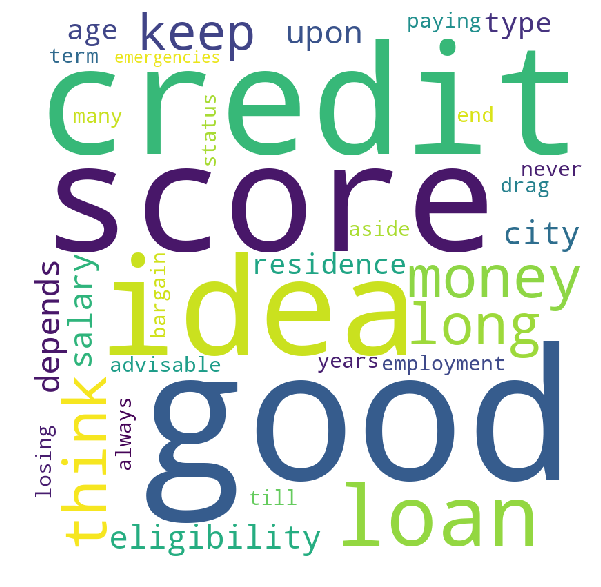

In [73]:
from wordcloud import WordCloud, STOPWORDS 

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd 

corpus = [
    "Your eligibility depends upon your city, salary, residence type, age, employment status, and credit score. If you have a good credit score, you can bargain more.",
    "It’s never a good idea to drag a loan for many years or you could end up losing more money.",
    "It is advisable to think long-term, so think till how long you can keep paying off the loan. It is always a good idea to keep some money aside for emergencies."
]

cloud_words = ' '

for val in corpus:
 # typecaste each val to string
    val = str(val)
 
 # split the value
    tokens = val.split()
     
        # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
         
    for words in tokens:
        cloud_words = cloud_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(cloud_words)
    # print(wordcloud)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


Frequency-based encoding methods suffer from the long tail, or Zipfian distribution, that characterizes natural language. As a result, tokens that occur very frequently are orders of magnitude more “significant” than other, less frequent ones. This can have a significant impact on some models (e.g., generalized linear models) that expect normally distributed features.

#### 2.One-hot encoding

###### A solution to this problem is one-hot encoding, a boolean vector encoding method that marks a particular vector index with a value of true (1) if the token exists in the document and false (0) if it does not.

In [23]:
from sklearn.preprocessing import Binarizer

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(corpus)

onehot = Binarizer()
vectors_onehot = onehot.fit_transform(vectors.toarray())

In [27]:
print(vectors_onehot)

print(vectors_onehot.shape)

[[0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
  1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0
  0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0]
 [1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0
  0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0]]
(3, 52)


In [34]:
from sklearn.preprocessing import Binarizer

del vectors
vectorizer = CountVectorizer(binary=True)
vectors = vectorizer.fit_transform(corpus)

print(vectors.toarray())

[[0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
  1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0
  0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0]
 [1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0
  0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0]]


#### 3.Term Frequency - Inverse Document Frequency

A better approach would be to consider the relative frequency or rareness of tokens in the document against their frequency in other documents. <br>
<br>
TF–IDF encoding normalizes the frequency of tokens in a document with respect to the rest of the corpus. It accentuates terms that are very relevant to a specific document.
<br>
<br>
The central insight is that meaning is most likely encoded in the more rare terms from a document. For example, in a corpus of sports text, tokens such as “umpire,” “base,” and “dugout” appear more frequently in documents that discuss baseball, while other tokens that appear frequently throughout the corpus, like “run,” “score,” and “play,” are less important.<br>
<br>

We interpret the score to mean that the closer the TF–IDF score of a term is to 1, the more informative that term is to that document. The closer the score is to zero, the less informative that term is.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
corpus = tfidf.fit_transform(corpus)

In [44]:
print(corpus.toarray())
pd.DataFrame(corpus.toarray())

[[0.         0.18601332 0.         0.18601332 0.         0.18601332
  0.14146793 0.18601332 0.         0.37202664 0.18601332 0.
  0.18601332 0.         0.18601332 0.         0.         0.10986246
  0.18601332 0.         0.         0.18601332 0.         0.
  0.         0.         0.         0.         0.         0.
  0.14146793 0.         0.         0.         0.         0.18601332
  0.18601332 0.37202664 0.         0.         0.18601332 0.
  0.         0.         0.         0.         0.18601332 0.
  0.18601332 0.         0.21972493 0.37202664]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.26971476 0.         0.         0.26971476
  0.         0.         0.         0.26971476 0.20512502 0.15929788
  0.         0.         0.20512502 0.         0.         0.20512502
  0.         0.20512502 0.         0.26971476 0.26971476 0.20512502
  0.20512502 0.26971476 0.         0.26971476 0.         0.
  0.         0.         0.         0.         0.         

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.000000,0.186013,0.000000,0.186013,0.000000,0.186013,0.141468,0.186013,0.000000,0.372027,...,0.000000,0.000000,0.000000,0.000000,0.186013,0.000000,0.186013,0.000000,0.219725,0.372027
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.269715,0.000000,...,0.000000,0.000000,0.000000,0.205125,0.000000,0.269715,0.000000,0.269715,0.159298,0.000000
2,0.166167,0.000000,0.166167,0.000000,0.166167,0.000000,0.126374,0.000000,0.000000,0.000000,...,0.166167,0.332334,0.166167,0.252749,0.000000,0.000000,0.000000,0.000000,0.098141,0.000000


#### 4. Distributed representations - word2vec, doc2vec

In [93]:
corpus = [
        "Your eligibility depends upon your city, salary, residence type, age, employment status, and credit score. If you have a good credit score, you can bargain more.",
        "It’s never a good idea to drag a loan for many years or you could end up losing more money.",
        "It is advisable to think long-term, so think till how long you can keep paying off the loan. It is always a good idea to keep some money aside for emergencies.",
        ]

In [94]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec


corpus = [list(tokenize(doc)) for doc in corpus]
corpus = [TaggedDocument(words, ['d{}'.format(idx)]) for idx, words in enumerate(corpus)]

model = Doc2Vec(corpus, size=7, min_count=0)
print(model.docvecs[0])


[ 0.03843604  0.01628663  0.05468123 -0.01201195  0.03241907 -0.03380773
  0.06233216]


c:\users\admin\venv\lib\site-packages\gensim\models\doc2vec.py:580: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [95]:
[print(vec) for vec in model.docvecs]

[ 0.03843604  0.01628663  0.05468123 -0.01201195  0.03241907 -0.03380773
  0.06233216]
[ 0.03889636 -0.05206067  0.0557959  -0.03954409  0.0697253   0.038394
  0.04519154]
[-0.03663519 -0.06676246  0.03769557 -0.01243174 -0.00505658  0.00360704
  0.02614829]


KeyError: "tag '3' not seen in training corpus/invalid"

### Topic Modeling

#### 1. LDA - Latent Dirichlet Allocation

In [5]:
from sklearn.datasets import fetch_20newsgroups

cats = ['rec.sport.hockey', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)

In [6]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((1777,), (1777,))

Let's look at sample data

In [7]:
print("\n".join(newsgroups_train.data[:3]))

From: golchowy@alchemy.chem.utoronto.ca (Gerald Olchowy)
Subject: Re: Flames Truly Brutal in Loss
Organization: University of Toronto Chemistry Department
Lines: 11

In article <vzhivov.735193129@cunews> vzhivov@superior.carleton.ca (Vladimir Zhivov) writes:
>As the subject suggests the Flames were not impressive this afternoon,
>dropping a 6-3 decision to the LA Kings. Most of the Flames neglected
>to show up, especially in their own zone, as the Kings hit at least
>five posts! The Flames best line was probably

Mike Vernon is now 3 wins 11 losses plus that All-Star game debacle in
afternoon games during his career...with another afternoon game with
Los Angeles next Sunday...has the ABC deal doomed the Flames?

Gerald

From: tdawson@engin.umich.edu (Chris Herringshaw)
Subject: WingCommanderII Graphics
Organization: University of Michigan Engineering, Ann Arbor
Lines: 8
Distribution: world
NNTP-Posting-Host: antithesis.engin.umich.edu

   I was wondering if anyone knows where I can get

In [118]:
import numpy as np

np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['rec.sport.hockey', 'comp.graphics', 'sci.space'], dtype='<U16')

In [8]:
# Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000
documents = newsgroups_train.data

# NMF is able to use tf-idf
#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
#tfidf = tfidf_vectorizer.fit_transform(documents)
#tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()


In [10]:
print(tf.toarray())
tf.shape

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 3 ... 0 0 0]]


(1777, 1000)

In [128]:
print(len(tf_feature_names))
tf_feature_names

1000


['00',
 '000',
 '01',
 '02',
 '03',
 '04',
 '10',
 '100',
 '11',
 '12',
 '128',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1992',
 '1993',
 '1993apr20',
 '1st',
 '20',
 '200',
 '21',
 '22',
 '23',
 '24',
 '25',
 '256',
 '26',
 '27',
 '28',
 '29',
 '2nd',
 '30',
 '300',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '3d',
 '3rd',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '500',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '90',
 '91',
 '92',
 '93',
 '95',
 '__',
 '___',
 '____',
 '_____',
 'abc',
 'able',
 'ac',
 'acad3',
 'access',
 'according',
 'actually',
 'adams',
 'add',
 'added',
 'address',
 'advance',
 'ago',
 'agree',
 'ahl',
 'air',
 'al',
 'alaska',
 'alchemy',
 'algorithm',
 'allen',
 'allow',
 'america

In [11]:
from sklearn.decomposition import LatentDirichletAllocation

no_topics = 3

# Run NMF
#nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


c:\users\admin\venv\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [17]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 5

#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
space edu nasa image graphics
Topic 1:
edu writes article com posting
Topic 2:
team hockey game play 10


#### 2.Non-negative matrix factorization

##### SVD 

We would clearly expect that the words that appear most frequently in one topic would appear less frequently in the other - otherwise that word wouldn't make a good choice to separate out the two topics. Therefore, we expect the topics to be **orthogonal**.

The SVD algorithm factorizes a matrix into one matrix with **orthogonal columns** and one with **orthogonal rows** (along with a diagonal matrix, which contains the **relative importance** of each factor).

<img src="images/svd_fb.png" alt="" style="width: 80%"/>
(source: [Facebook Research: Fast Randomized SVD](https://research.fb.com/fast-randomized-svd/))

SVD is an **exact decomposition**, since the matrices it creates are big enough to fully cover the original matrix. SVD is extremely widely used in ML, including:

- collaborative filtering/recommendations ([winning entry for Netflix Prize](https://datajobs.com/data-science-repo/Recommender-Systems-%5BNetflix%5D.pdf))
- calculate Moore-Penrose pseudoinverse
- data compression
- principal component analysis

<img src="images/nmf_doc.png" alt="NMF on documents" style="width: 80%"/>

<img src="images/nmf_example.png" alt="NMF on documents" style="width: 80%"/>

In [13]:
# Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000
documents = newsgroups_train.data

#NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()



In [14]:
from sklearn.decomposition import NMF

no_topics = 5

#Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf = nmf_model.fit(tfidf)



In [15]:
H1 = nmf_model.components_

In [18]:
show_topics(H1)

NameError: name 'show_topics' is not defined